## Setting

<ul>

<li>$x_1,...,x_n$ i.i.d. on $[0,1]$ latent variables. Later we can try changing the distribution </li>

<li>$y_k=f(x_k)+\epsilon_k$ with $\epsilon_k$ i.i.d and Gaussian with variance $\sigma$ and f a function to be estimated

<li>$k(,)$ a kernel and $\phi$ a link function with range $[0,1]$ so that $\phi(k(x,y)$ is a parameter for a Bernoulli variable

 <li>$a_{x,x_i}=Bernoulli(\phi(k(x,x_i))$- probability of edge between $x$ and $x_i$

<li>$y_1,...,y_n$ and $a_{x,i}$ are observed. Later we may assume that $a_{i,j}$ are observed as well </li>


We try to estimate $f(x)$ with $\hat{f}(x)=\frac{\sum_{i}a_{x,i}y_i}{\sum_{i}a_{x,i}}$



In [11]:
import numpy as np
from matplotlib import pyplot as plt
import gc
import os

In [12]:
def norm(x):
    return(np.sqrt(np.dot(x,x)))
def snorm(x):
    return(np.dot(x,x))

Kernel zoo: We introduce various kernels to see how the choice of a kernel effects the estimator

In [13]:
def rectangular(x,y,h):
    s=0
    if snorm((x-y)/h)<1:
        s=1/2
    seq=[s,'rectangular']
    return seq

def gaussian(x,y,h):
    seq=[np.exp(-snorm((x-y)/h)),'gaussian']
    return seq

def laplacian(x,y,h):
    seq=[np.exp(-norm((x-y)/h)),'laplacian']
    return seq

def triangular(x,y,h):
    s=0
    if np.abs(x-y)<h:
        s=1-np.abs(x-y)/h
    seq=[s,'triangular']
    return seq

def Epanechnikov(x,y,h):
    s=0
    if np.abs(x-y)<h:
        s=15*(1-(x-y)**2/h**2)/16    
    seq=[s,'Epanechnikov']
    return seq

def invdistance(x,y,h):
    seq=[1/(1+norm((x-y)/h)),'invdistance']
    return seq

def sinvdistance(x,y,h):
    seq=[1/(1+snorm((x-y)/h)),'sinvdistance']
    return seq


Function zoo: We introduce various functions f to see how well our estimator performs on different functions

In [14]:
def f_1(x):
    outs=[np.sin(28*x)*np.exp((-x**2))+x+x**2,'f_1']
    return outs 

def f_2(x):
    outs=[np.cos(6*x)/(x**2+1),'f_2']
    return outs

def f_3(x):
    outs=[2+x-np.exp(x**2),'f_3']
    return outs

def f_4(x):
    outs=[2*x-x**2+x**3-x**4,'f_4']
    return outs

### Code for computing NW and GNW estimators

#### Inputs

<ul>
    <li> data - latent positions variables $x_1,...,x_n$
    <li> noise - standard gaussian varialbles $\epsilon_1,...,\epsilon_n$
    <li> sigma - $\sigma$, scaling factor for noise
    <li> kernels - sequence of kernels on which NW and GNW are computed
    <li> width - bandwith of the kernel
    <li> x - point to be estimated
    <li> functions - sequence of functions on which NW and GNW are computed
        <\ul>

#### Outputs:

A sequence with elements [$\hat{f}_{GNW}(x)$,$\hat{f}_{NW}(x)$,function_used,kernel_used]

<ul>
<li>$\hat{f}_{GNW}(x)$ - GNW estimator evaluated at x 

<li>$\hat{f}_{NW}(x)$ - NW estimator evaluated at x

<li>function_used - indicates which function is used in the estimation

<li>kernel_used - indicates which kernel is used in the estimation
<\ul>


The last two features are useful for labeling plots efficiently.

In [15]:
def test0(data,noise,sigma,kernels,width,x,functions):
    outputs=[]
    for kernel in kernels:
        
        for f in functions:
            
         
            num=0
            denom=0
            NW_num=0
            NW_denom=0
            y_observations=f(data)[0]+sigma*noise
        
            for j in range(len(data)):
                parameter=kernel(x,data[j],width)[0]
                a=np.random.binomial(n=1,p=parameter)
                num=num+a*y_observations[j]
                denom=denom+a
                NW_num=NW_num+parameter*y_observations[j]
                NW_denom=NW_denom+parameter
            
            outputs.append(np.array([num/denom,NW_num/NW_denom,f(data)[1],kernel(x,data[0],width)[1]]).copy())
        
    return(outputs)

## Data generation

In [64]:
data=np.random.uniform(size=10000)
noise=np.random.normal(size=10000)

## Preparation stage

This block of code prepares the functions and kernels on which estimation is performed

In [65]:
testing_points=np.linspace(0,1,num=100)
random_testing_points=np.random.uniform(size=20)


functions=[f_1,f_2,f_3,f_4]
functions_labels=['f_1','f_2','f_3','f_4']
kernels=[rectangular,gaussian,laplacian,invdistance,sinvdistance,triangular,Epanechnikov]
kernels_labels=['rectangular','gaussian','laplacian','invdistance','sinvdistance','triangular','Epanechnikov']
gc.collect()

f_1_evals=[]
f_2_evals=[]
f_3_evals=[]
f_4_evals=[]

f_evals=[]


for testing_point in testing_points:
    f_1_evals.append(f_1(testing_point)[0])
    f_2_evals.append(f_2(testing_point)[0])
    f_3_evals.append(f_3(testing_point)[0])
    f_4_evals.append(f_4(testing_point)[0])
    
f_evals.append(f_1_evals)
f_evals.append(f_2_evals)
f_evals.append(f_3_evals)
f_evals.append(f_4_evals)

# One dimensional data 

Here we study one dimensional data. We study how the noise level, the kernel and the ammount of data affect the estimator.



We compare $\hat{f}_{GNW}(x)$, $\hat{f}_{NW}(x)$ and $f(x)$.

In [82]:
complete_data=[]

for testing_point in testing_points:
    complete_data.append(test0(data,noise,sigma=12.5,kernels=kernels,width=0.11,x=testing_point,functions=functions))

In [ ]:
complete_data_random=[]

for testing_point in random_testing_points:
    complete_data_random.append(test0(data,noise,sigma=0,kernels=kernels,width=0.11,x=testing_point,functions=functions))

In [83]:
GNW_final_plots=[]
NW_final_plots=[]

RGNW_final_plots=[]
RNW_final_plots=[]

for f_label in functions_labels:
    for k_label in kernels_labels:
        GNW_final_plot=[f_label,k_label]
        NW_final_plot=[f_label,k_label]
        
        RGNW_final_plot=[f_label,k_label]
        RNW_final_plot=[f_label,k_label]
        for c in complete_data:
            for v in c:
                if v[2]==f_label and v[3]==k_label:
                    GNW_final_plot.append((v[0]))
                    NW_final_plot.append((v[1]))
                    
        #for c in complete_data_random:
         #   for v in c:
          #      if v[2]==f_label and v[3]==k_label:
           #         RGNW_final_plot.append((v[0]))
            #        RNW_final_plot.append((v[1]))
                    
                    
        GNW_final_plots.append(GNW_final_plot)
        NW_final_plots.append(NW_final_plot)
        
        #RGNW_final_plots.append(RGNW_final_plot)
        #RNW_final_plots.append(RNW_final_plot)

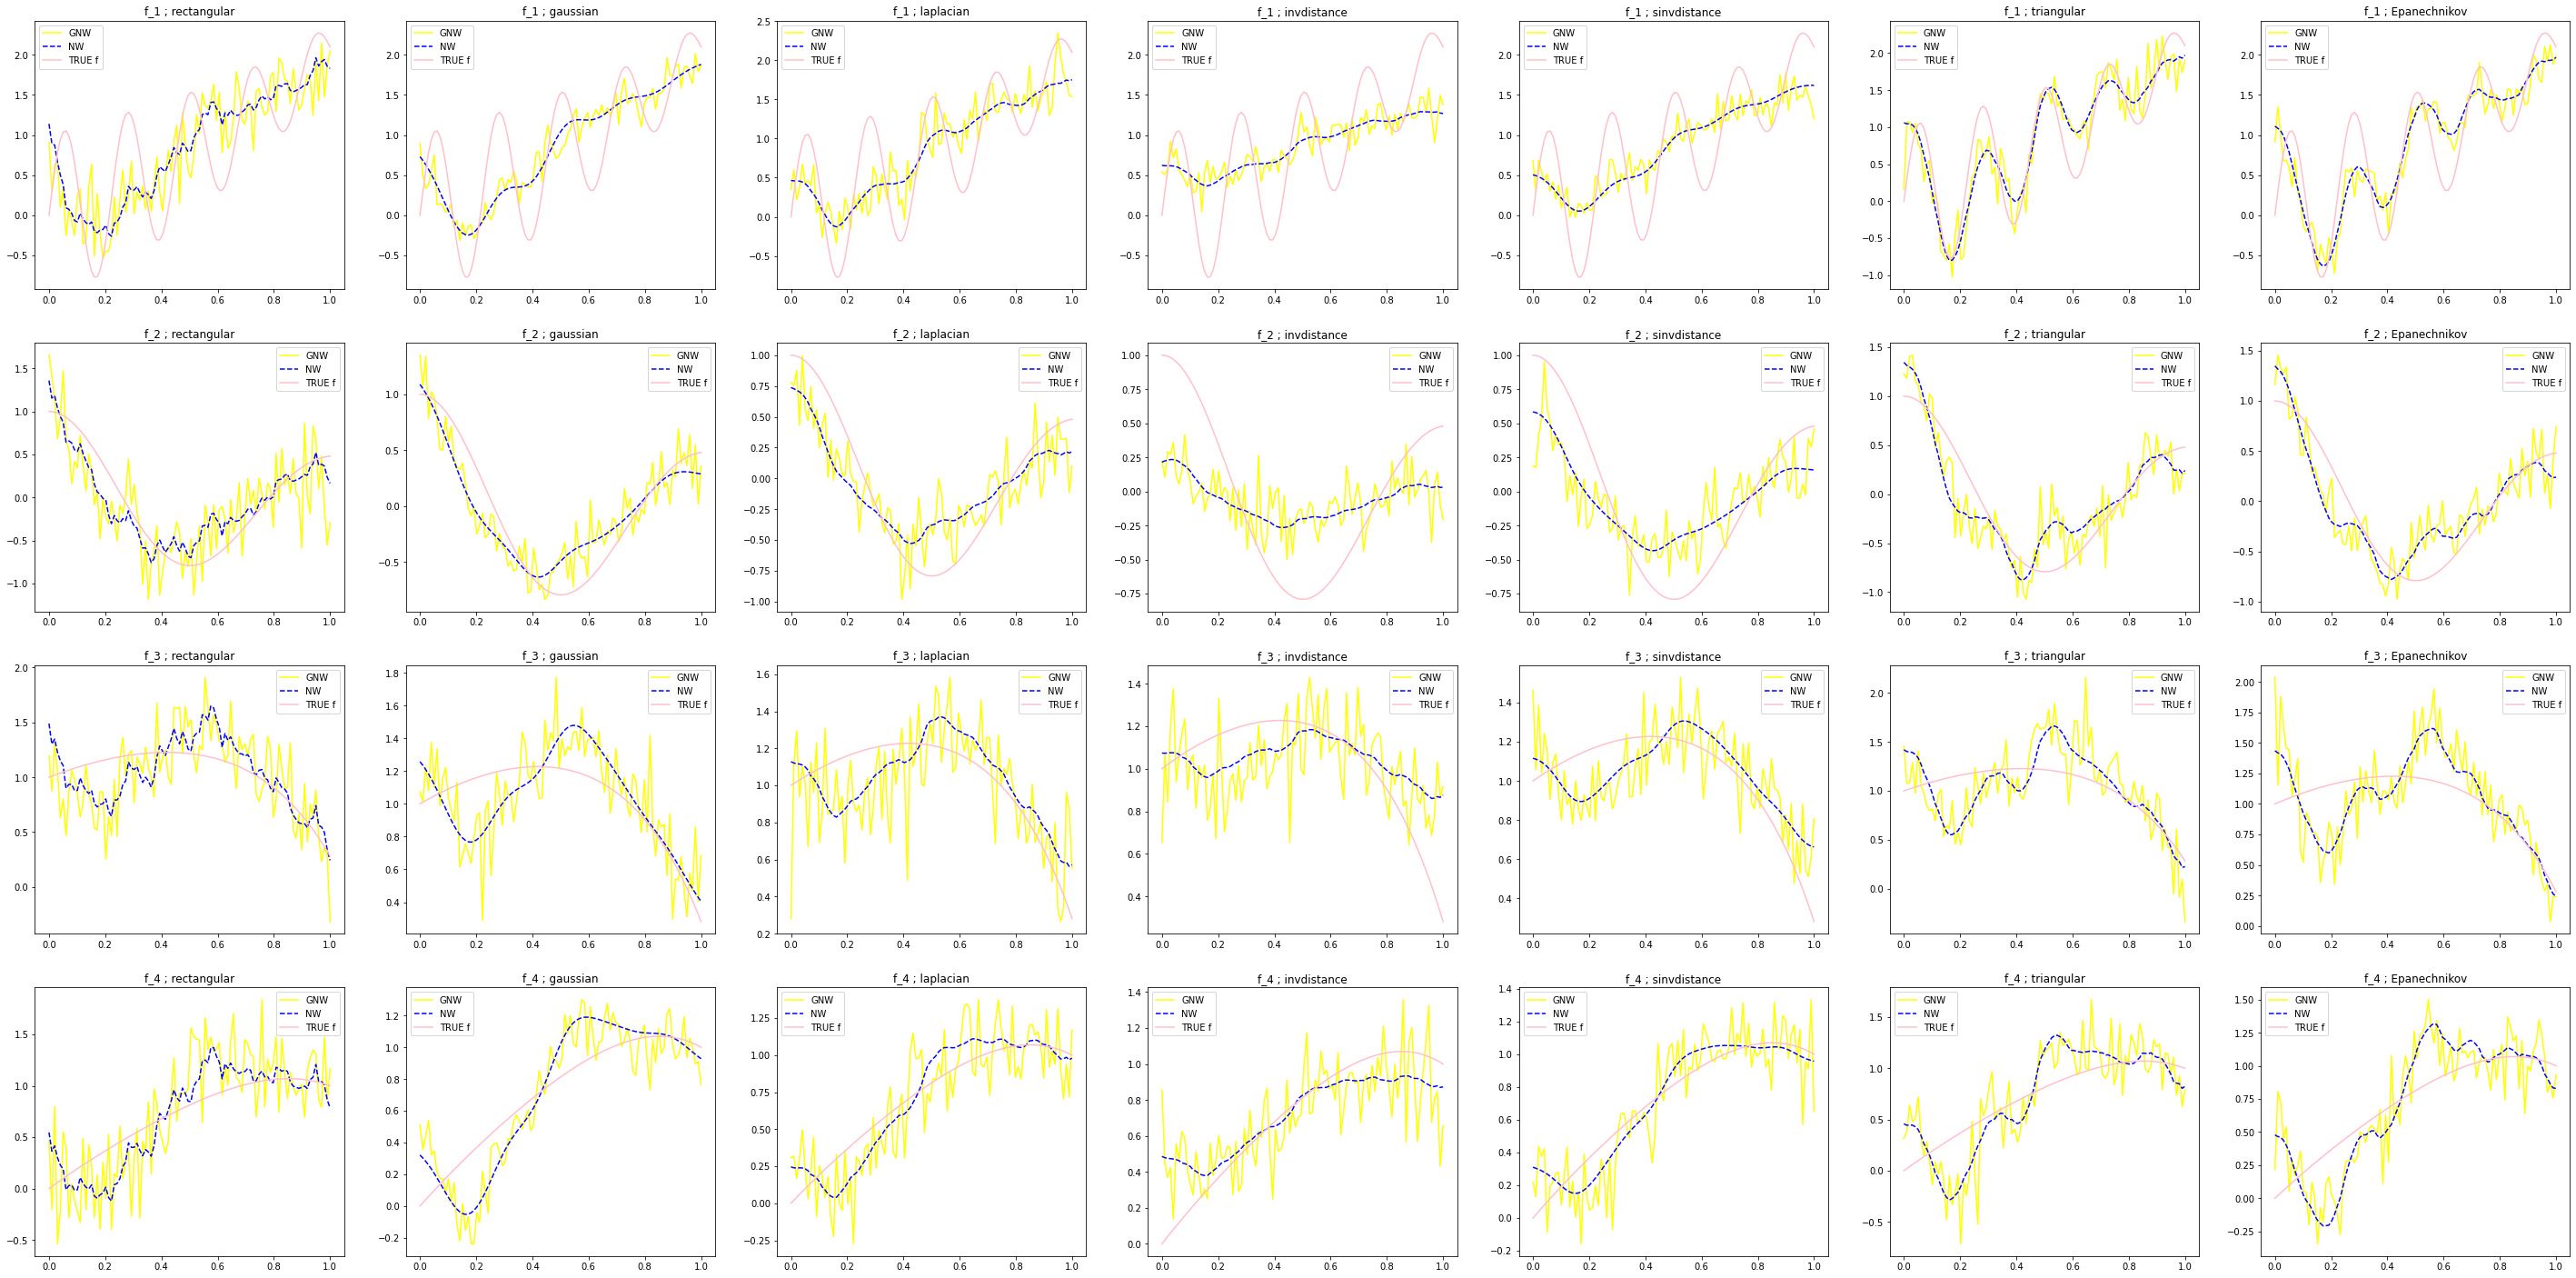

In [84]:

fig=plt.figure()

counter=0
tracker='f_1'




for j in range(28):

    b=GNW_final_plots[j]
    c=NW_final_plots[j]
    
    if tracker!=b[0]:
        counter=counter+1
        tracker=b[0]
        
    fig.add_subplot(4,7,j+1)
    plt.plot(testing_points,np.array(b[2:]).astype(float),color='yellow',label='GNW')
    plt.plot(testing_points,np.array(c[2:]).astype(float),color='blue',linestyle='dashed',label='NW')
    plt.plot(testing_points,f_evals[counter],color='pink',label='TRUE f')
    plt.title(b[0]+' ; '+b[1])
    plt.legend()
    


fig.set_figwidth(50)
fig.set_figheight(25)
plt.savefig('/home/martin/Desktop/LPM plots/Simulations_v3/1_dimensional_data/Large Sample/Very Large Noise/'+'LSVLANO')
plt.show()
            

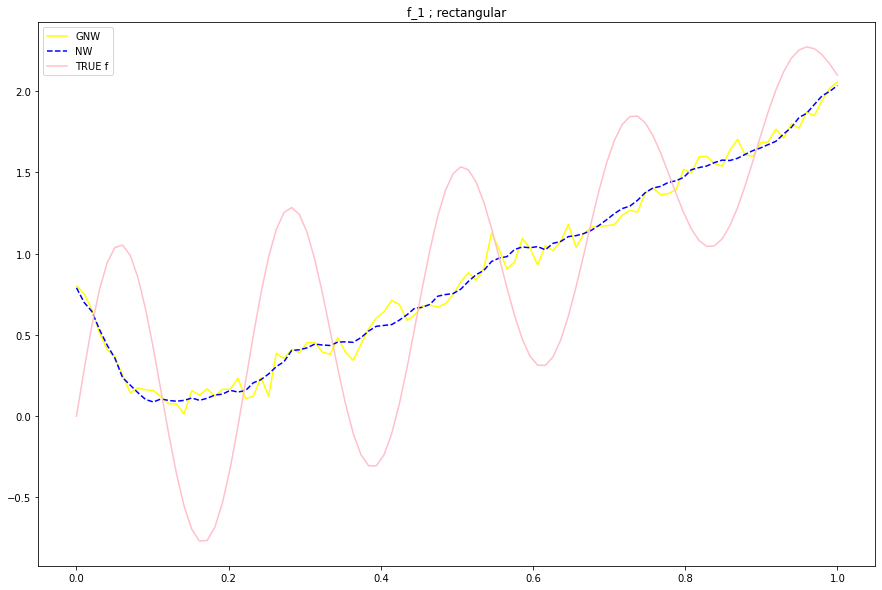

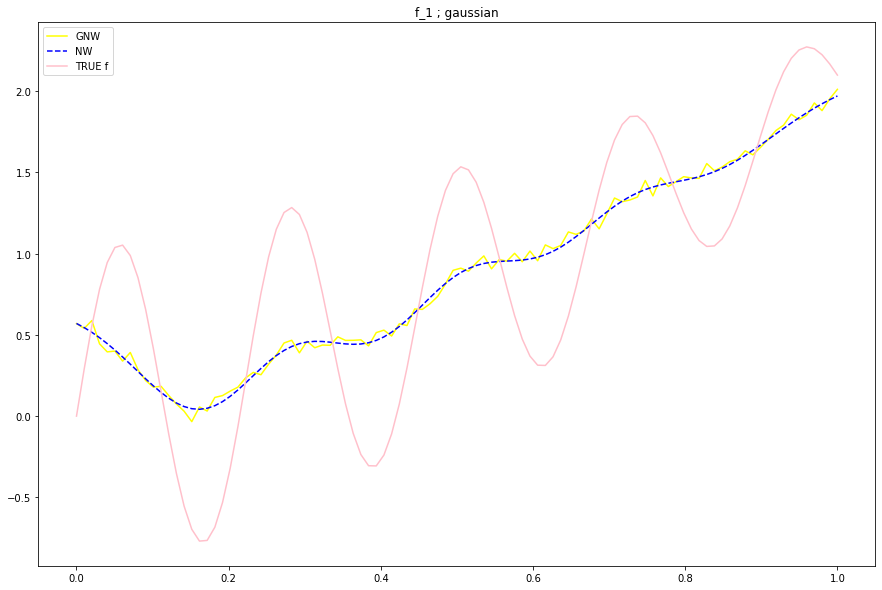

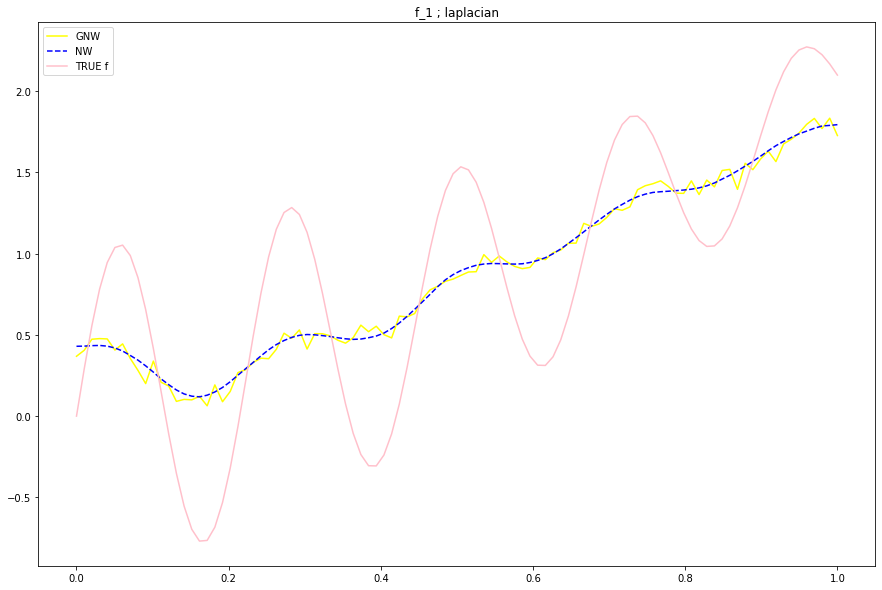

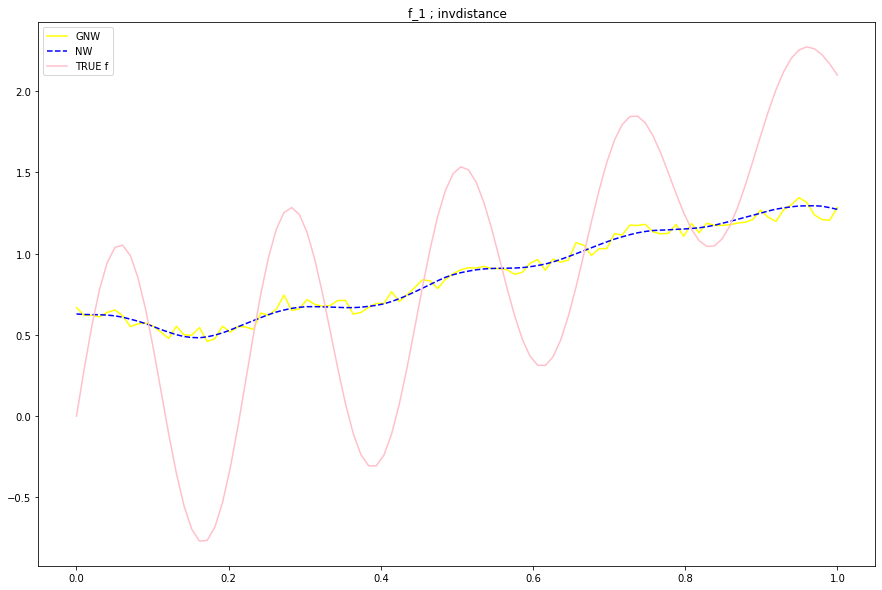

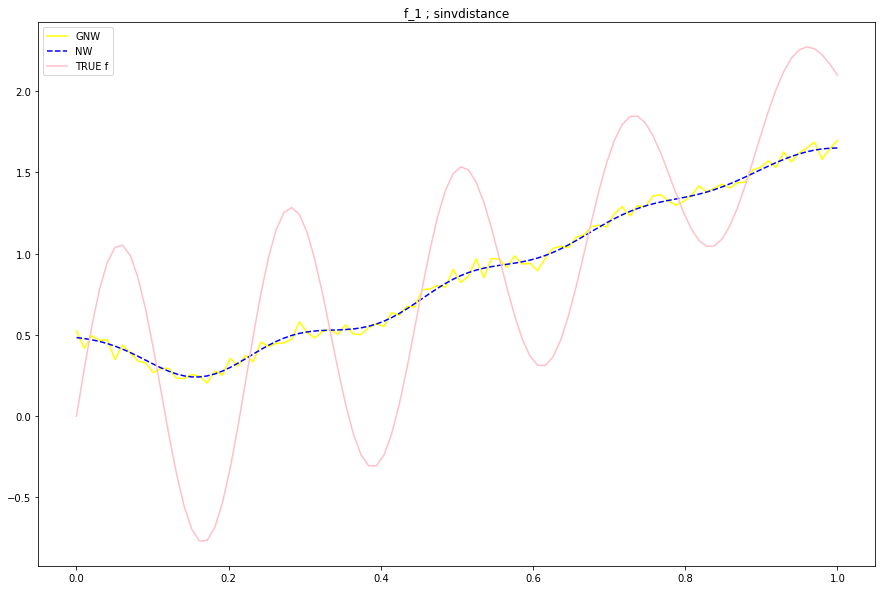

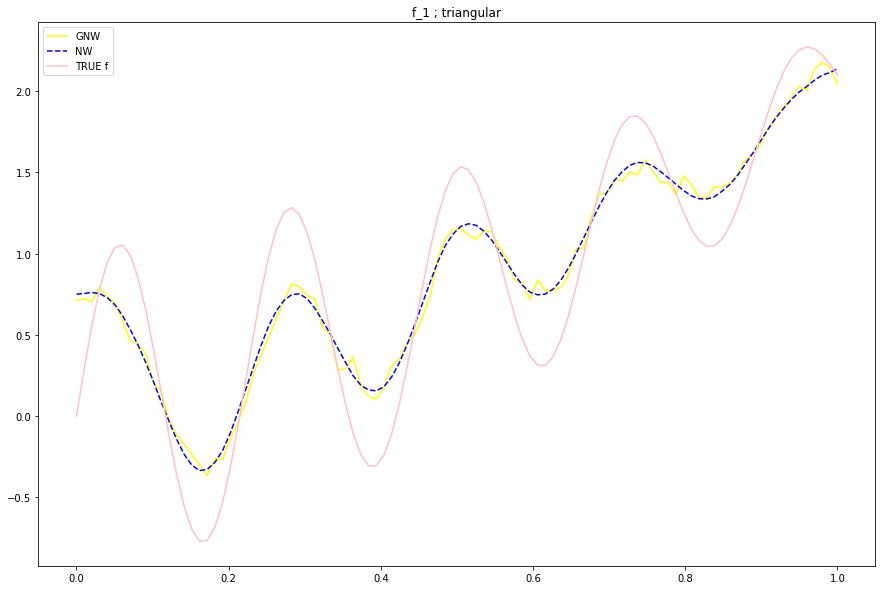

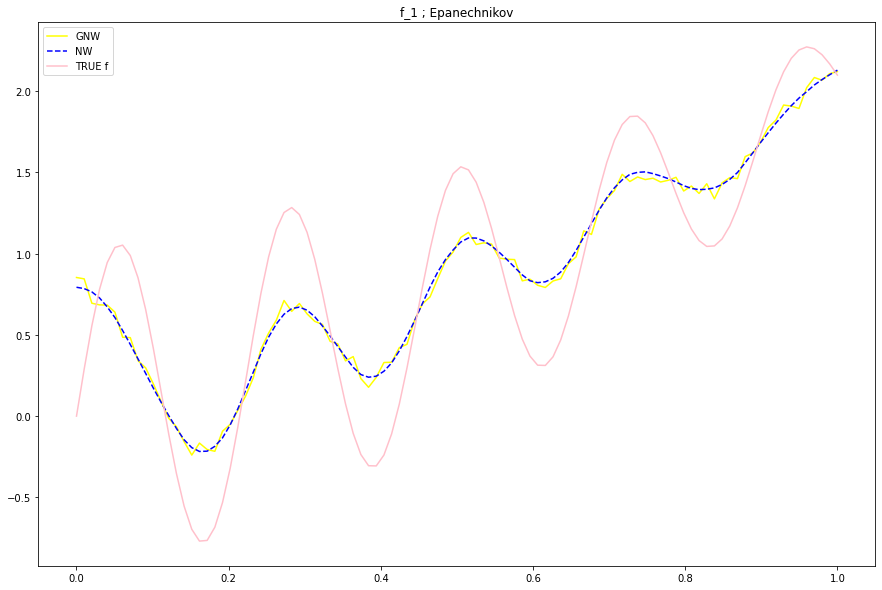

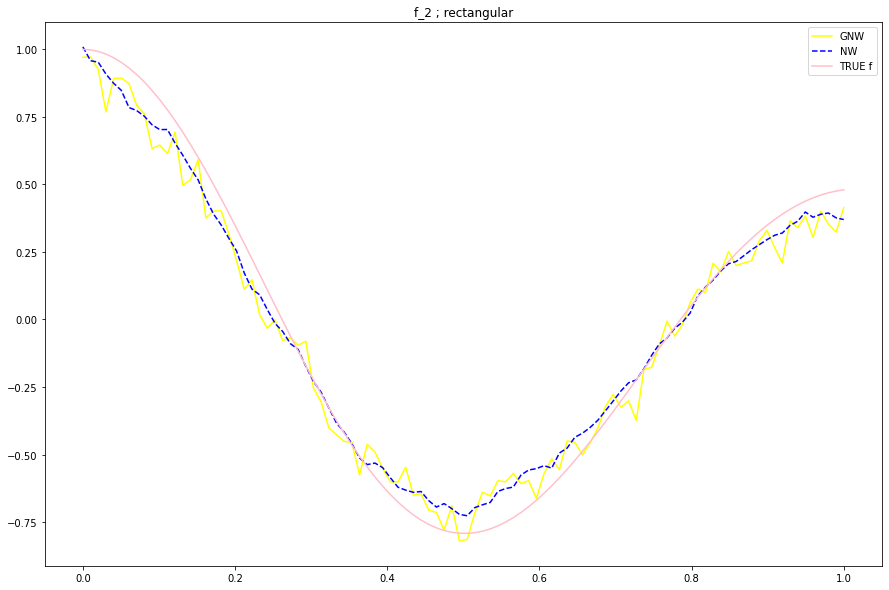

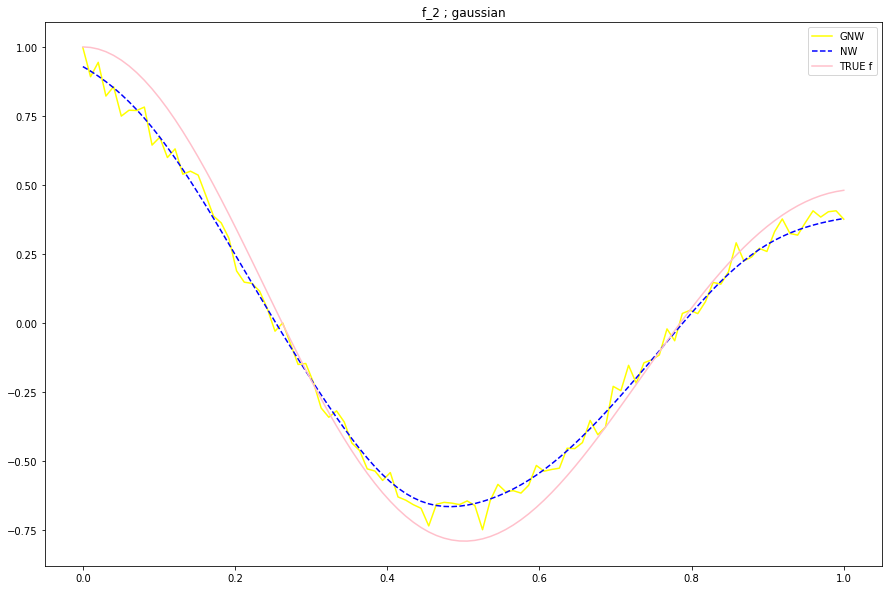

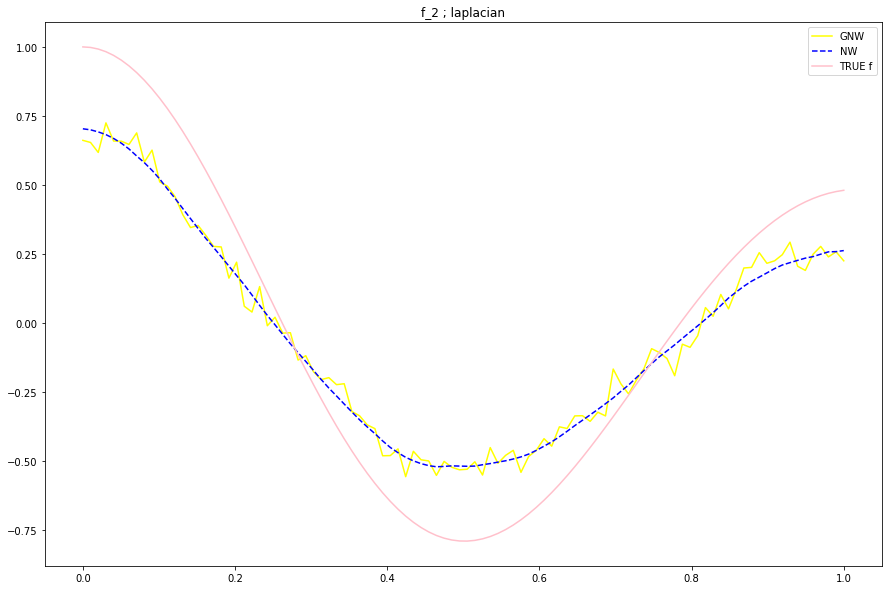

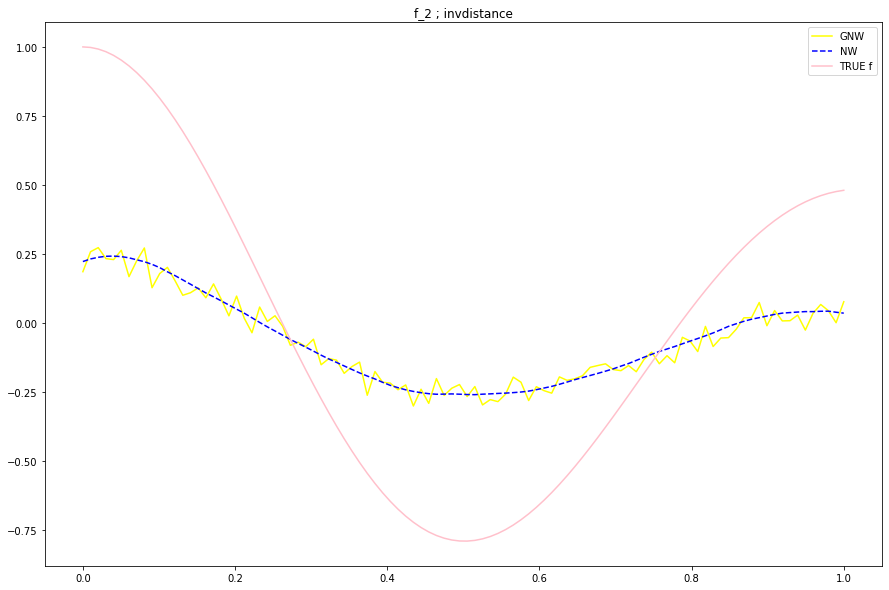

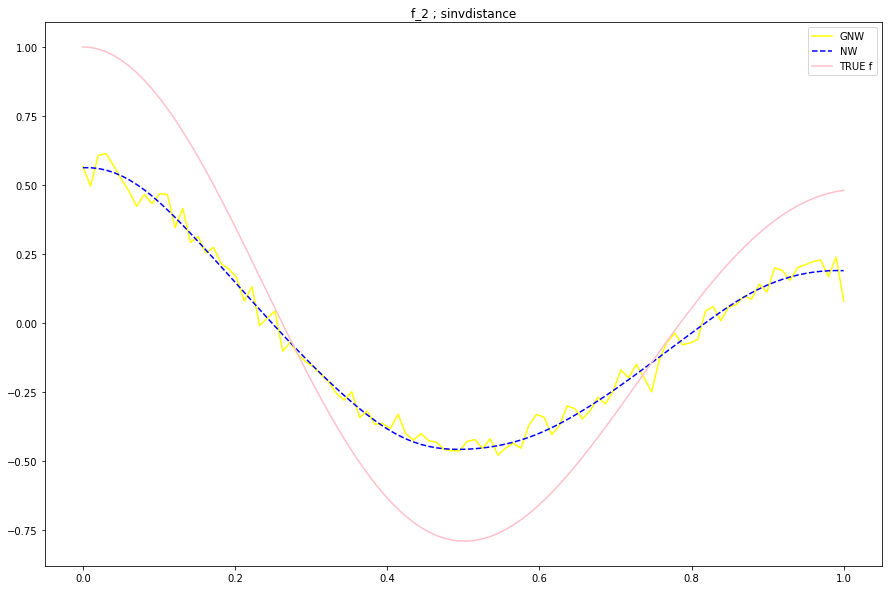

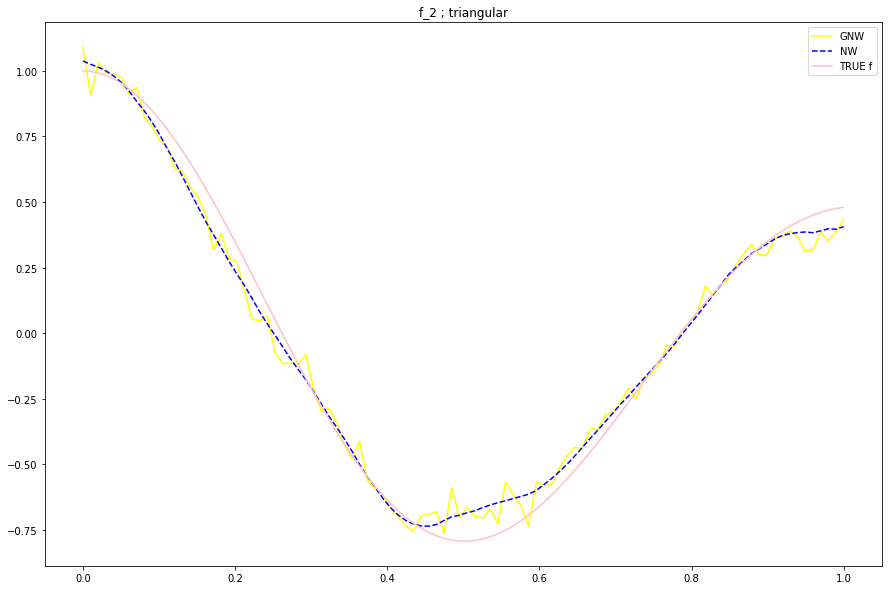

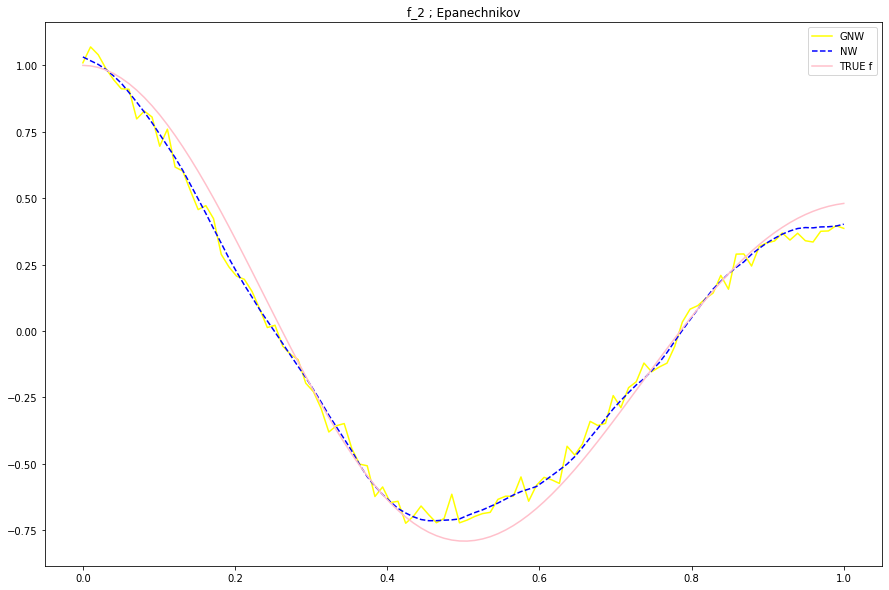

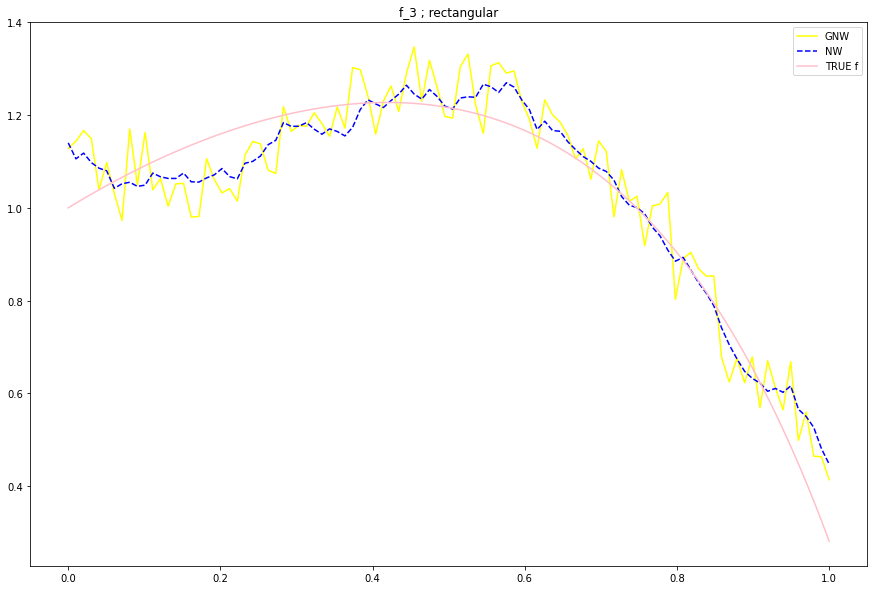

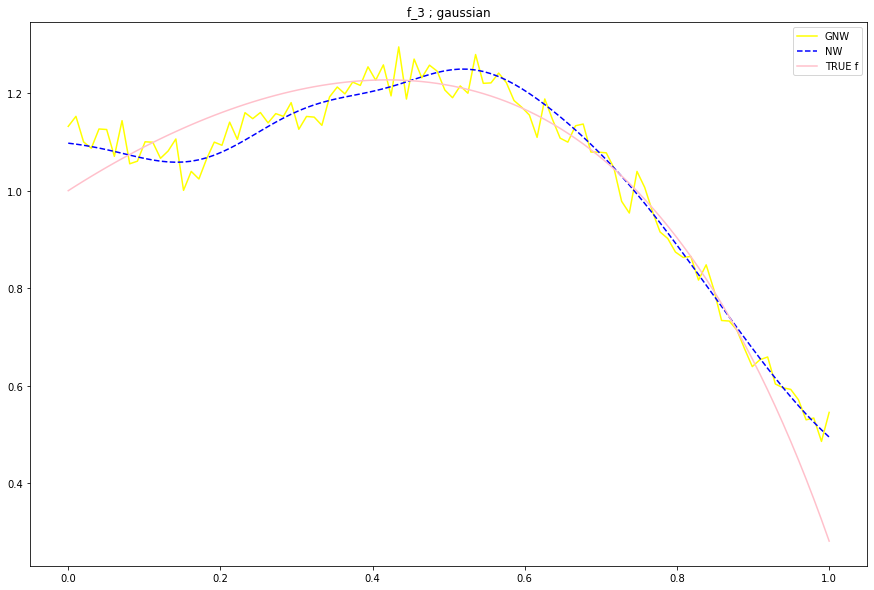

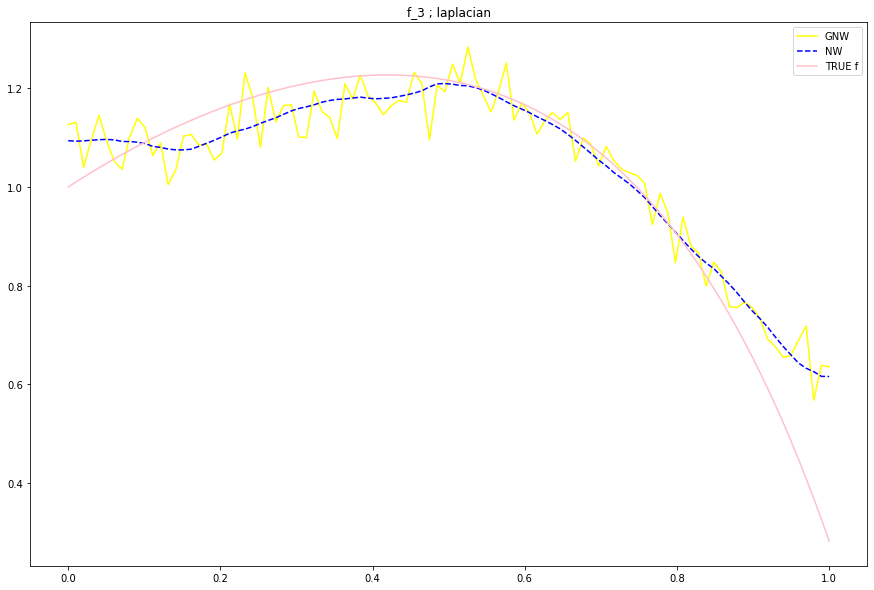

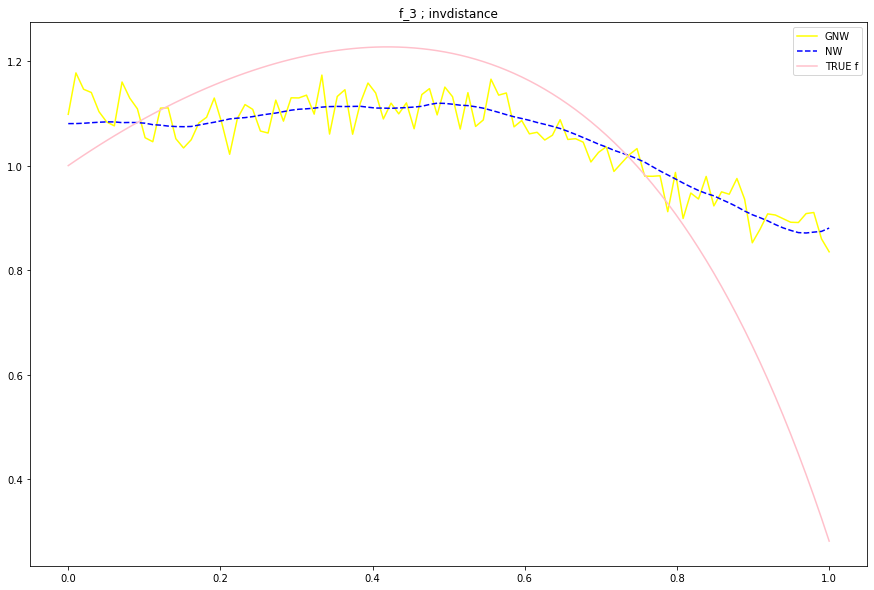

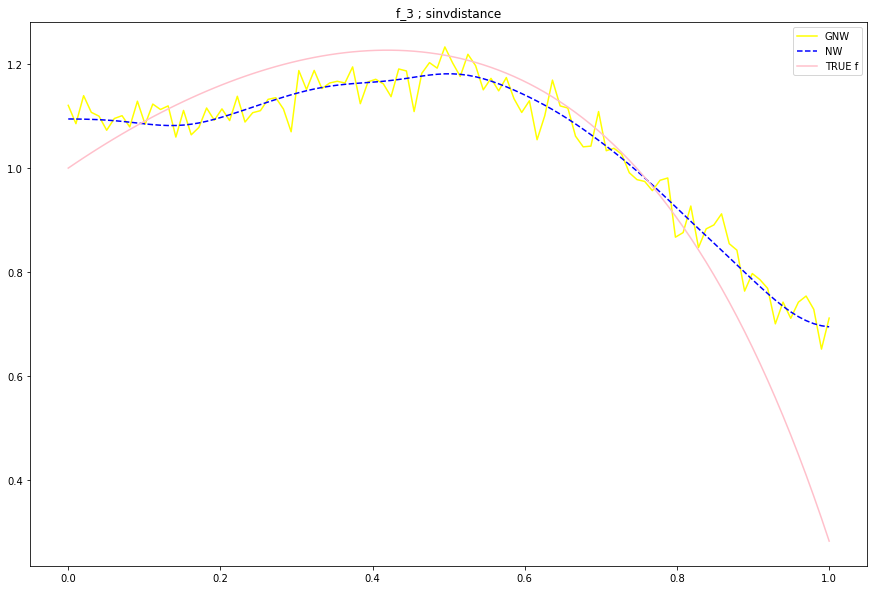

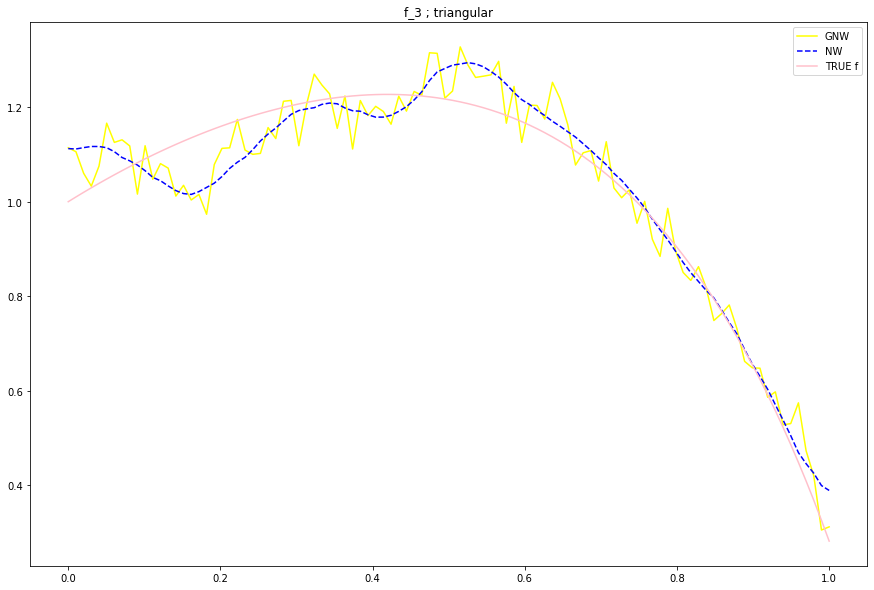

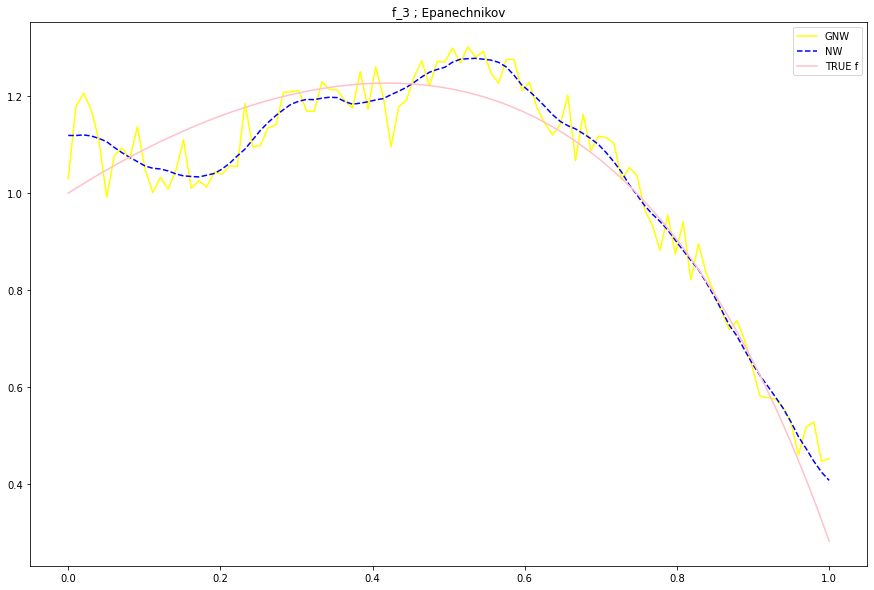

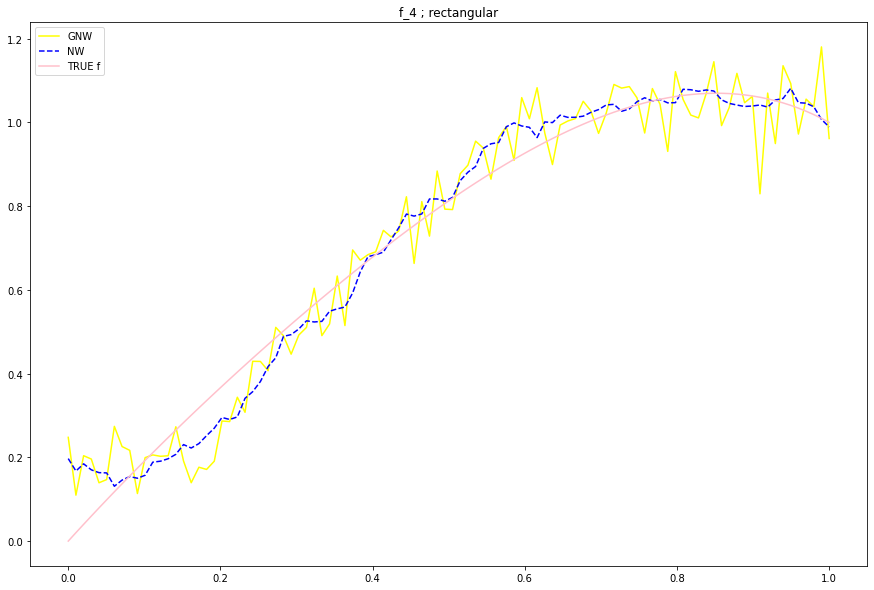

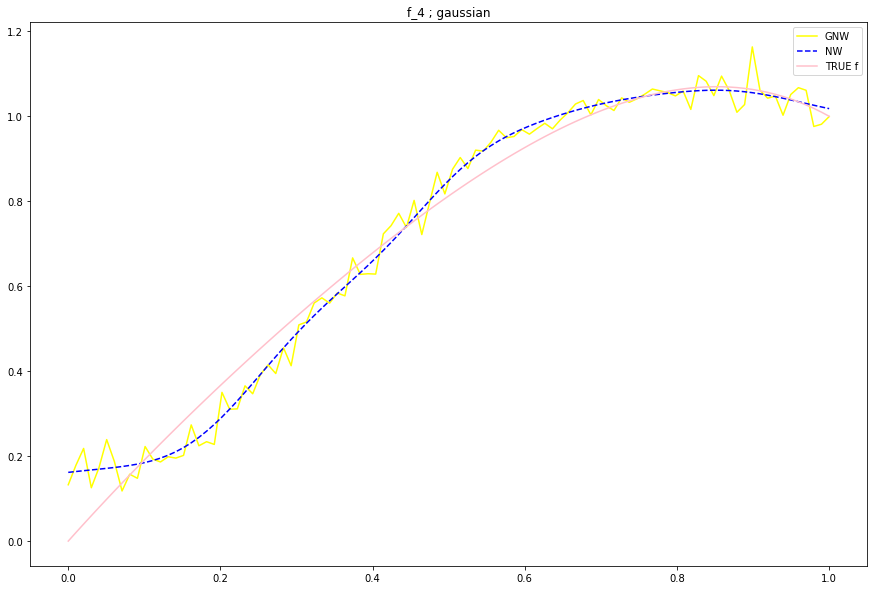

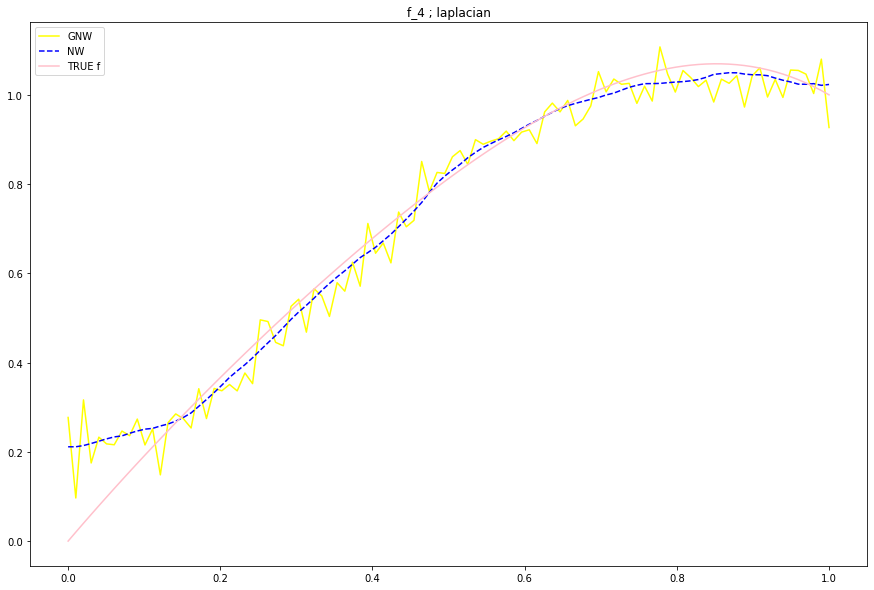

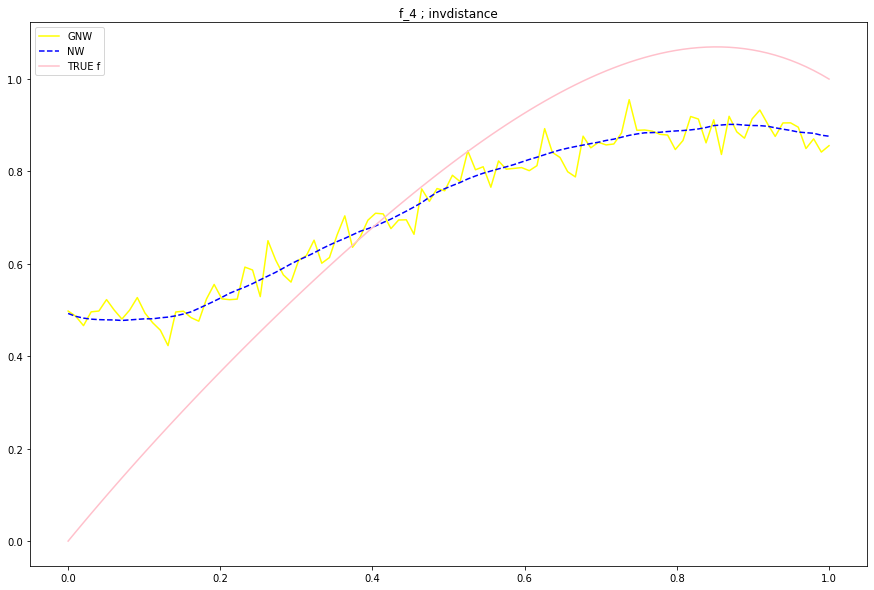

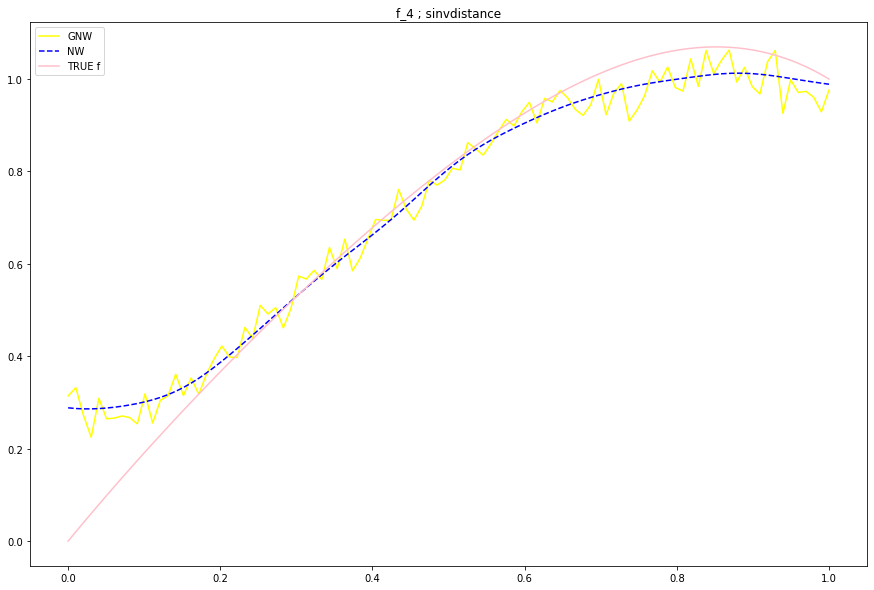

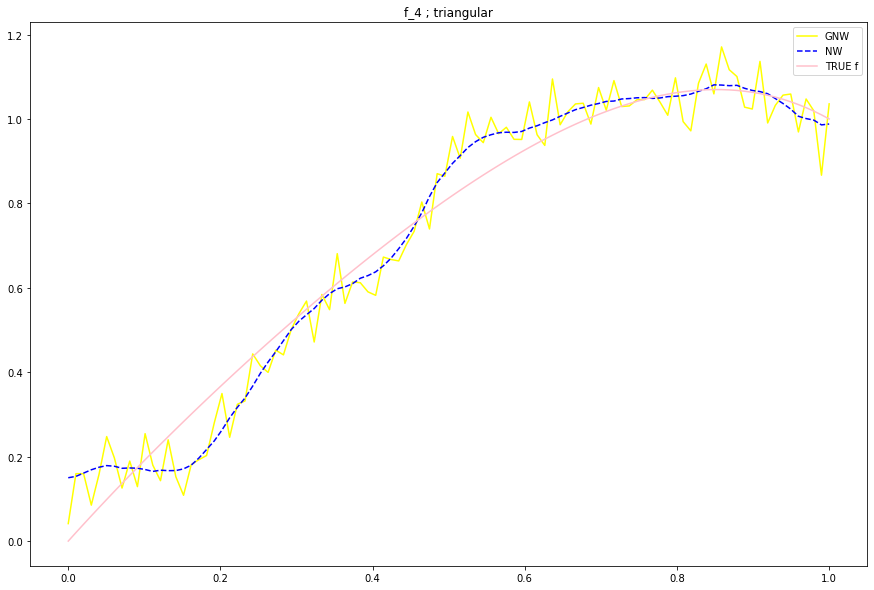

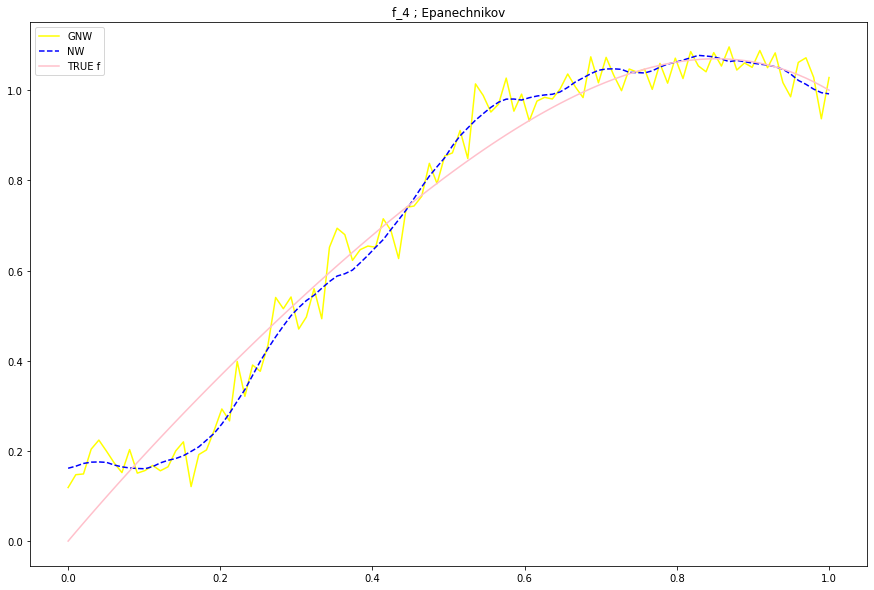

In [81]:
plt.rcParams['figure.figsize']=[15,10]


counter=0
tracker='f_1'


for j in range(28):

    b=GNW_final_plots[j]
    c=NW_final_plots[j]
    
    if tracker!=b[0]:
        counter=counter+1
        tracker=b[0]
        
    fig=plt.figure()
    plt.plot(testing_points,np.array(b[2:]).astype(float),color='yellow',label='GNW')
    plt.plot(testing_points,np.array(c[2:]).astype(float),color='blue',linestyle='dashed',label='NW')
    plt.plot(testing_points,f_evals[counter],color='pink',label='TRUE f')
    plt.title(b[0]+' ; '+b[1])
    plt.legend()
    plt.savefig('/home/martin/Desktop/LPM plots/Simulations_v3/1_dimensional_data/Large Sample/Very Large Noise/'+"LSVLAN_%s_%s"%(b[0],b[1]))
    plt.show()
    